In [34]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import  warnings
from scipy.stats import zscore
warnings.filterwarnings("ignore")


**EDA:**

In [18]:
data = pd.read_csv('winequality-red.csv')
data.sample(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
300,7.5,0.530,0.06,2.6,0.086,20.0,44.0,0.99650,3.38,0.59,10.7,6
431,7.8,0.550,0.35,2.2,0.074,21.0,66.0,0.99740,3.25,0.56,9.2,5
1326,6.7,0.460,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
989,9.7,0.295,0.40,1.5,0.073,14.0,21.0,0.99556,3.14,0.51,10.9,6
1197,7.7,0.570,0.21,1.5,0.069,4.0,9.0,0.99458,3.16,0.54,9.8,6


In [19]:
data.shape

(1599, 12)

In [21]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [23]:
data.sample(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
52,6.6,0.500,0.04,2.1,0.068,6.0,14.0,0.99550,3.39,0.64,9.4,6
915,8.6,0.315,0.40,2.2,0.079,3.0,6.0,0.99512,3.27,0.67,11.9,6
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
204,7.0,0.430,0.36,1.6,0.089,14.0,37.0,0.99615,3.34,0.56,9.2,6
1082,7.2,0.380,0.30,1.8,0.073,31.0,70.0,0.99685,3.42,0.59,9.5,6


In [24]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [25]:
X=data.drop(['quality'],axis=1)
y=data['quality']

In [26]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**Let's check the correlations between the features :**

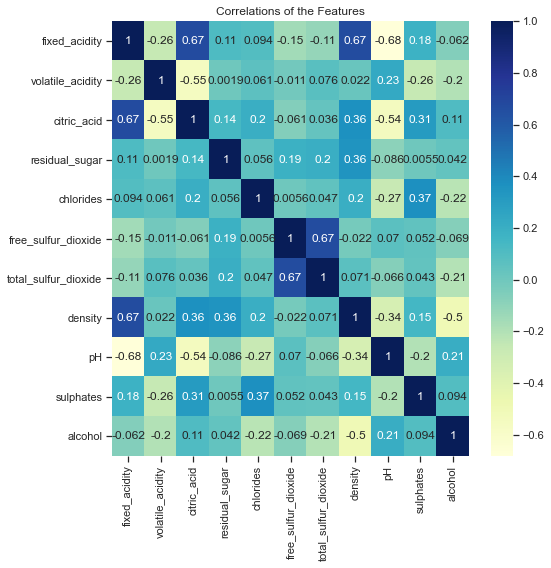

In [27]:
plt.figure(figsize=[8,8])
sns.heatmap(X.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlations of the Features')
plt.show()

Let's see how many target classes we have in our data:

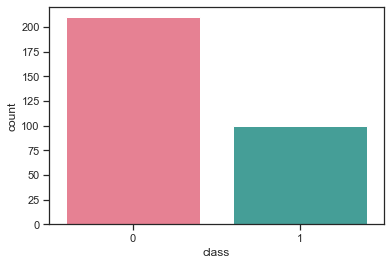

In [8]:
sns.countplot(data['class'], palette='husl')
plt.show()

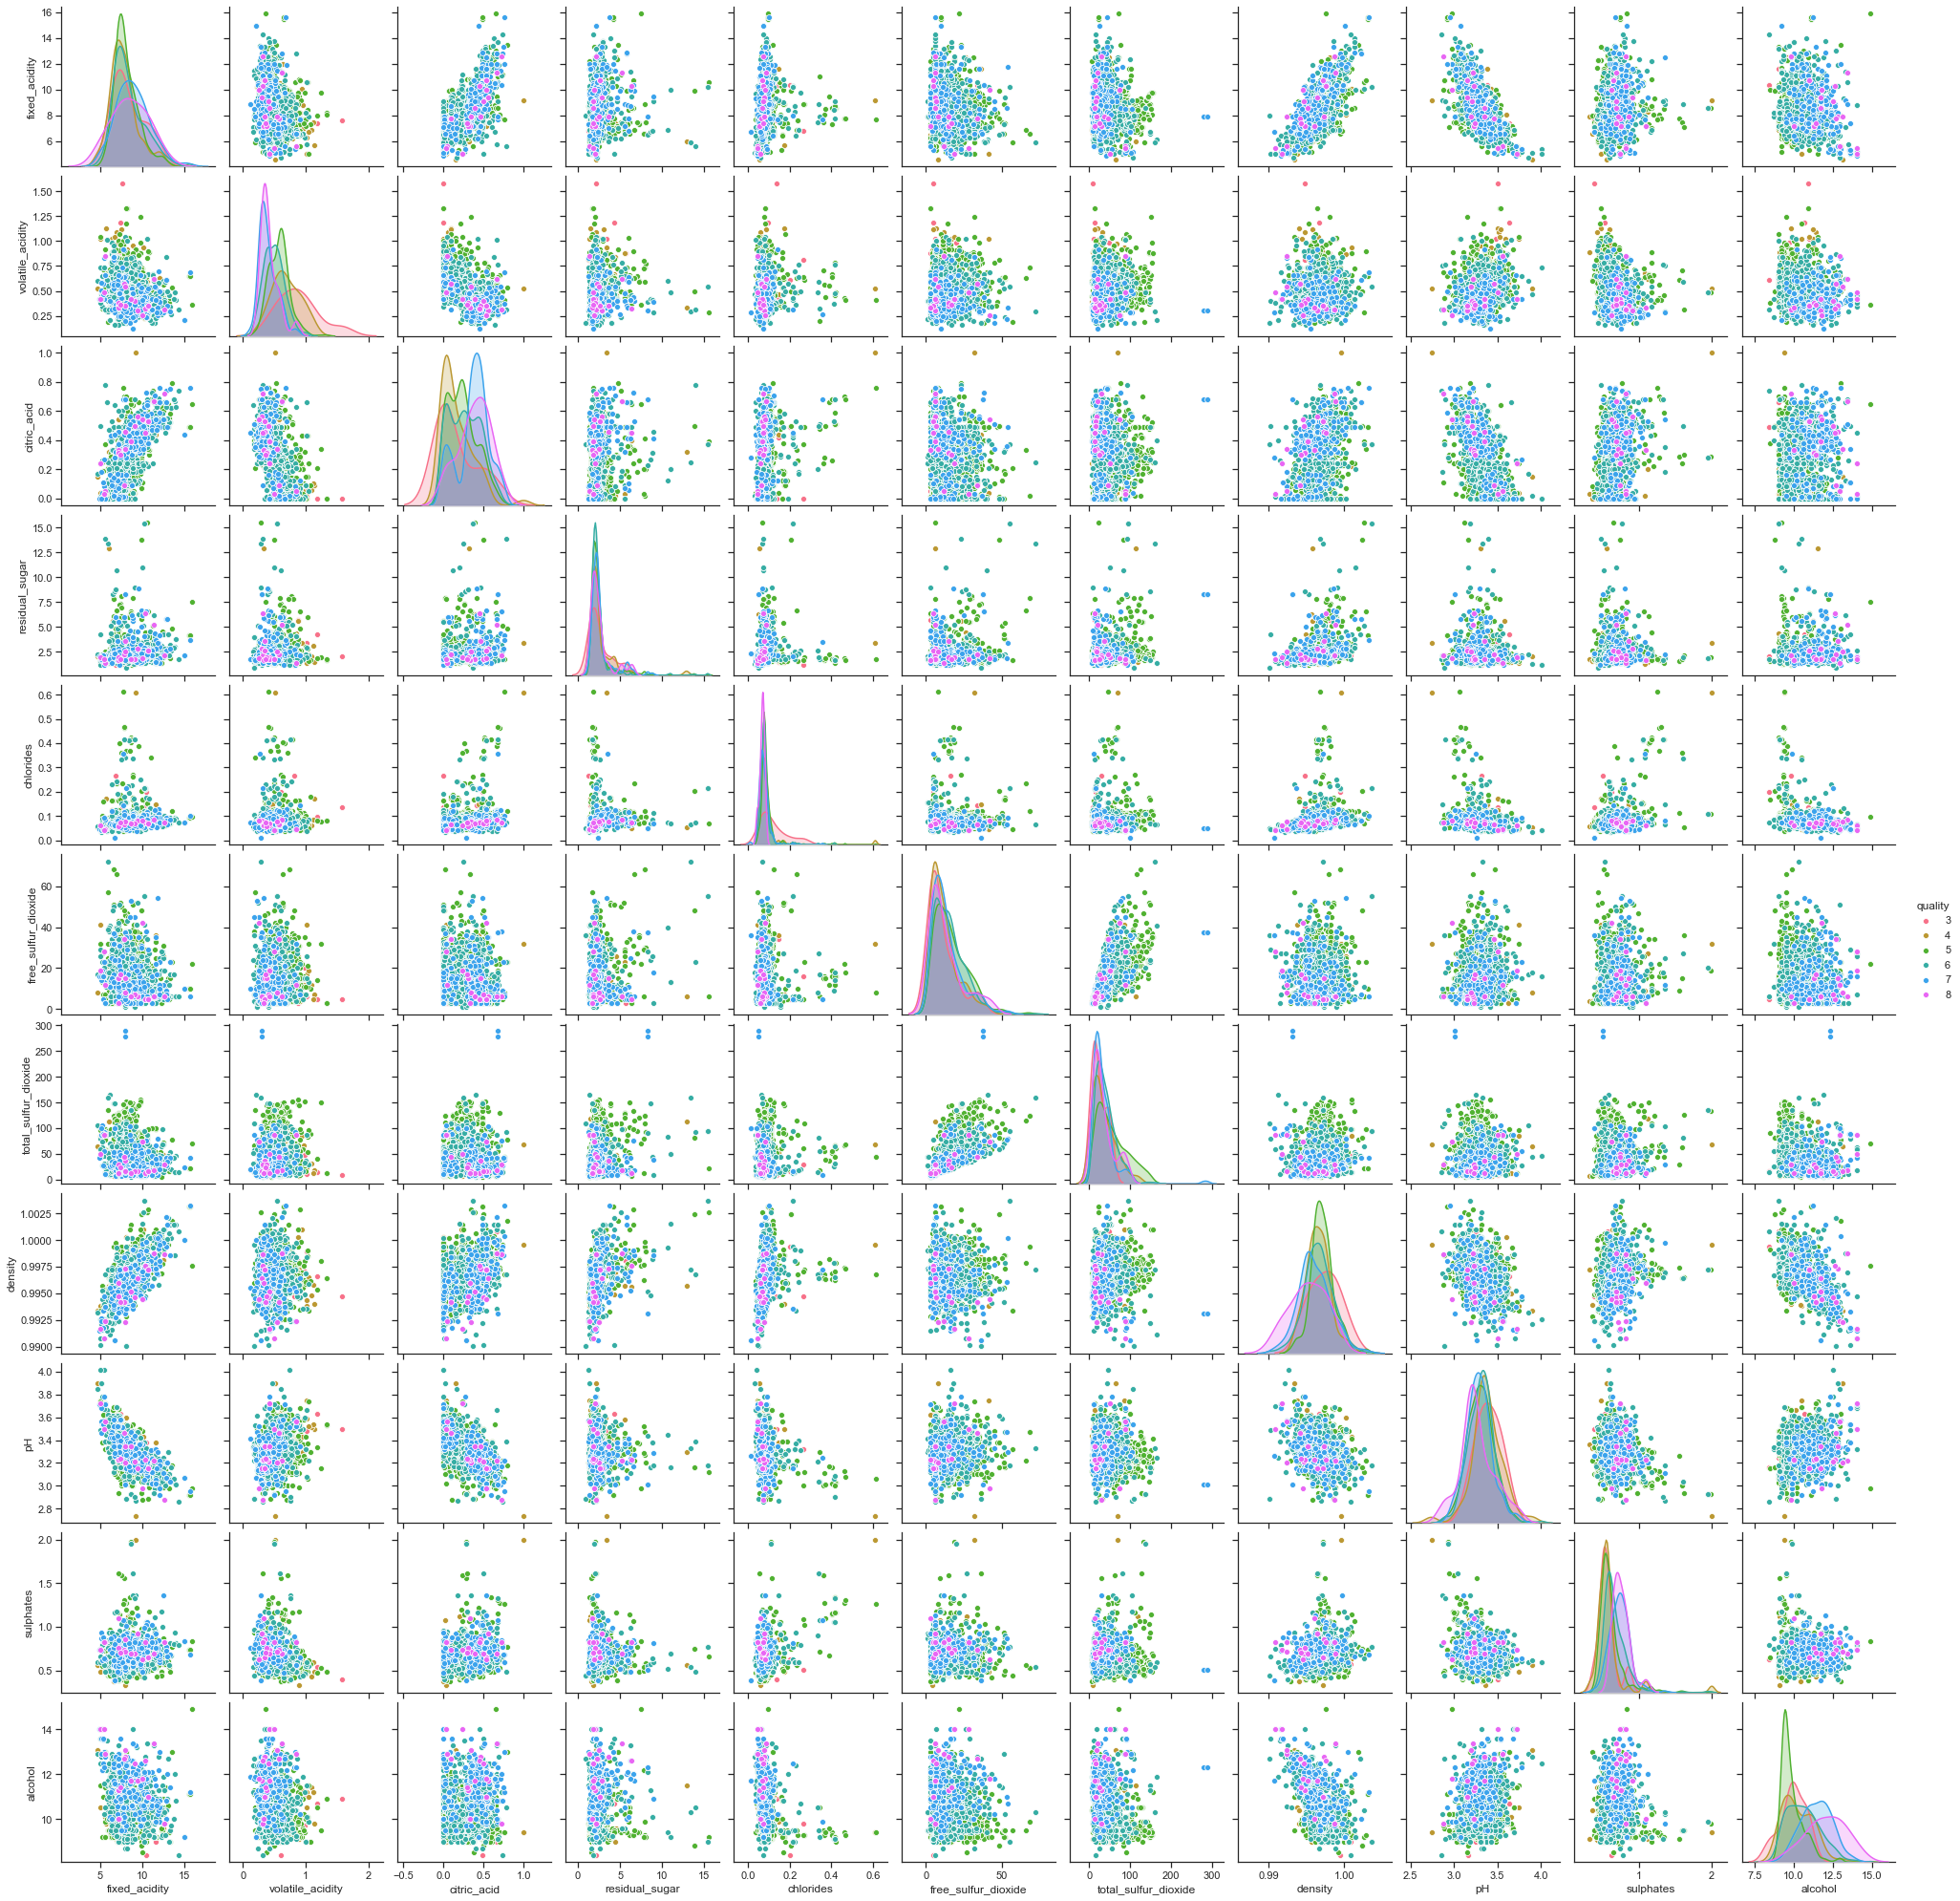

In [29]:
i = sns.pairplot(data ,hue='quality', palette='husl')
plt.show()

**CREATING THE DATA SET:**

In [32]:
# Excluding target feature and create a new dataset:
df = data.iloc[:,0:11]
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [33]:
df_scaled = df.apply(zscore)

Now we are going to build our machine learning clustering models. 

we will be using two methods; **k-means clustering** and **hierarchical clustering/Agglomerative clustering** algorithms.

For k-means clustering algorithm:

* First of all I will find the best k value.
* Than I will use this k value to create a k-means model.
* And I will compare my original and k-means clustered datas.

For hierarchical clustering algorithm:

* First I will apply a dendrogram in order to find how many classes do I have in my data.
* Than I will use this class number to apply a hierarchical clustering algorithm.
* Lastly I will compare my original, k-means and hierarchical clustered datas.


**K-MEANS CLUSTERING ALGORITHM:**

**Finding the best K value:**

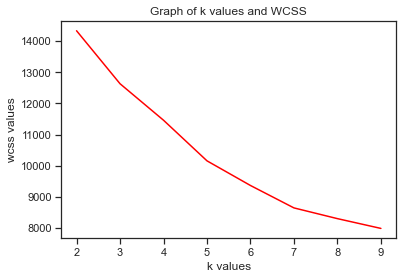

In [78]:
from sklearn.cluster import KMeans

wcss = []
ss=[]

for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    ss.append(metrics.silhouette_score(df_scaled,kmeans.labels_))
    
# Visualization of k values:

plt.plot(range(2,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

In [79]:
wcss

[14330.153664036317,
 12629.974591741668,
 11459.050113054283,
 10155.402219313964,
 9364.43990931412,
 8645.26150746317,
 8300.894005209479,
 7987.090697866949]

In [80]:
ss

[0.2139417458778928,
 0.18920406811068666,
 0.17154187154083608,
 0.19026993359227543,
 0.19229050521503668,
 0.1904162964308963,
 0.14919610952657825,
 0.15238530470959916]

**K-Means Clustering Algorithm:**

In [68]:
# Now we know our best k value is 2/3, I am creating a new kmeans model:
kmeans2 = KMeans(n_clusters=2)

# Training the model:
m1=kmeans2.fit(df_scaled)
clusters = m1.predict(df_scaled)

# Adding a label feature with the predicted class values:
df_k = df.copy(deep=True)
df_k['label'] = clusters

In [69]:
clusters

array([1, 1, 1, ..., 1, 1, 1])

In [70]:
m1.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [71]:
df_k['label'].value_counts()

1    1011
0     588
Name: label, dtype: int64

In [72]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [73]:
df_k.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [74]:
# Calculate Silloutte Score 
from sklearn import metrics
metrics.silhouette_score(df_scaled,m1.labels_)

0.2139417458778928

In [81]:
centroids=m1.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.924577,-0.633927,0.986456,0.163472,0.266961,-0.236061,-0.214935,0.501632,-0.713763,0.533210,0.170578
1,-0.537736,0.368693,-0.573725,-0.095076,-0.155265,0.137293,0.125006,-0.291750,0.415126,-0.310116,-0.099208


In [82]:
m1.inertia_

14330.142460208788

**Comparing Original Classes and K-Means Algorithm Classes:**

For visualization I will use only two features (A and P) for the original and predicted datasets. Different classes will have seperate color and styles.

In [84]:
print('Original Data Classes:')
print(data['quality'].value_counts())
print('-' * 30)
print('Predicted Data Classes:')
print(df_k.label.value_counts())

Original Data Classes:
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64
------------------------------
Predicted Data Classes:
1    1011
0     588
Name: label, dtype: int64


**HIERARCHICAL CLUSTERING ALGORITHM:**

**Creating the Dendrogram:**

We use dendrogram to find how many classes we have in our data set.

In [118]:
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(df_scaled, method='ward')

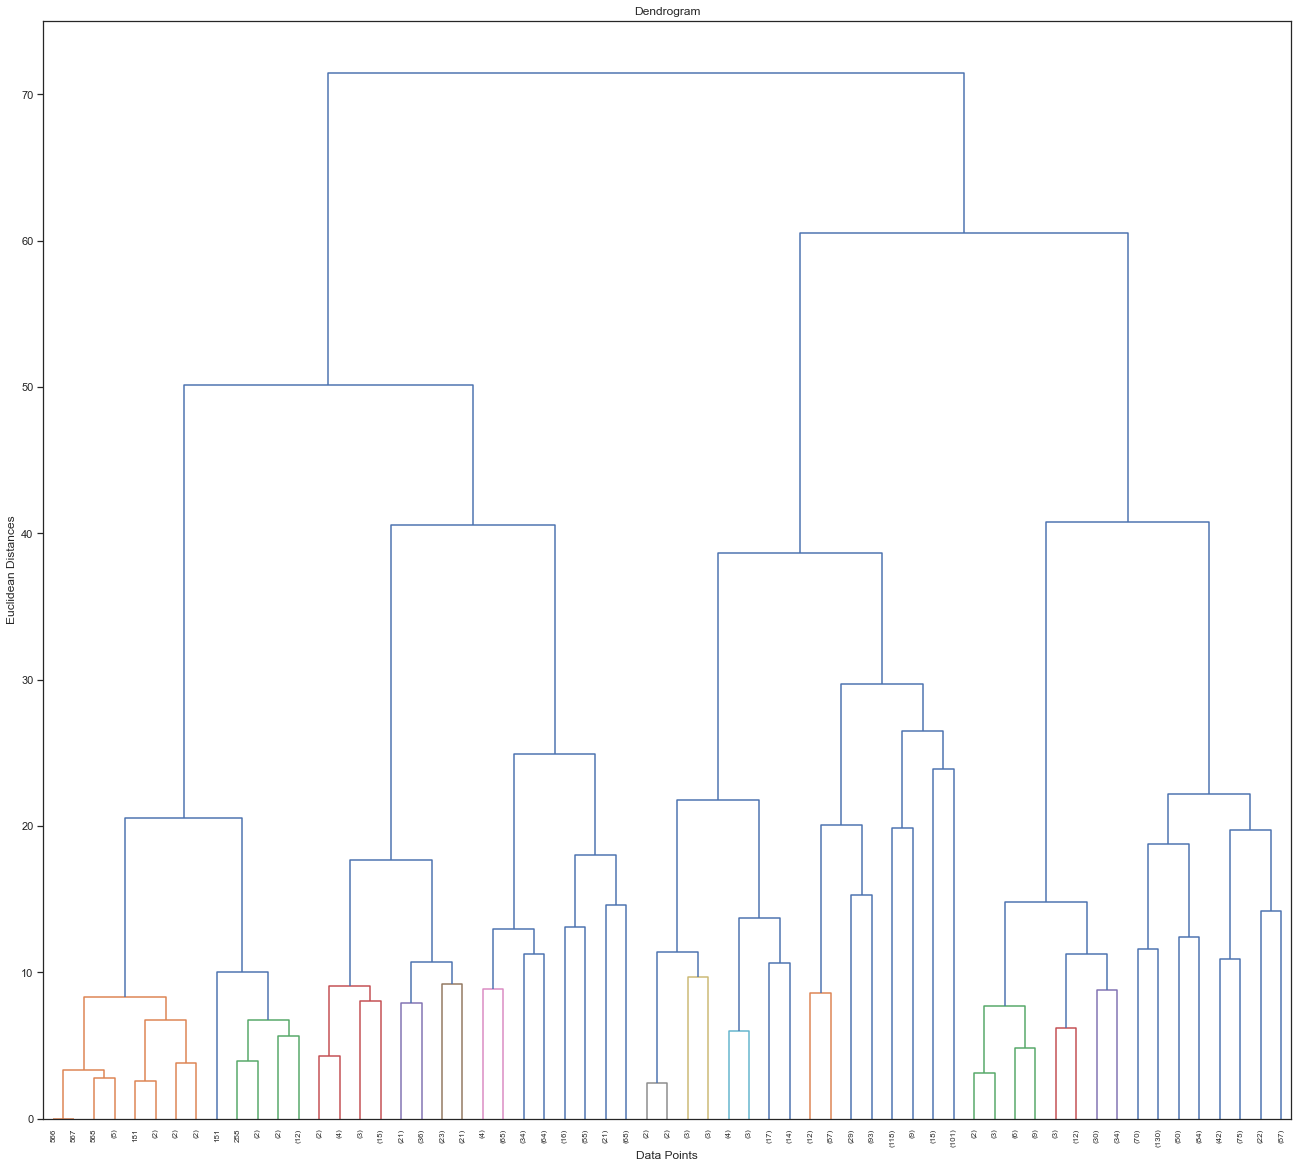

In [123]:
plt.figure(figsize=(18,16))
dendrogram(merg, leaf_rotation=90.0,color_threshold=10,leaf_font_size=8,truncate_mode='level',p=5)
plt.tight_layout()
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [62]:
data1.iloc[273]

pelvic_incidence            35.8776
pelvic_tilt numeric         1.11237
lumbar_lordosis_angle       43.4573
sacral_slope                34.7652
pelvic_radius               126.924
degree_spondylolisthesis   -1.63224
class                        Normal
Name: 273, dtype: object

In [64]:
data1.iloc[9]

pelvic_incidence             36.6864
pelvic_tilt numeric          5.01088
lumbar_lordosis_angle        41.9488
sacral_slope                 31.6755
pelvic_radius                84.2414
degree_spondylolisthesis    0.664437
class                       Abnormal
Name: 9, dtype: object

In [65]:
data1.iloc[197]

pelvic_incidence             58.8284
pelvic_tilt numeric          37.5779
lumbar_lordosis_angle        125.742
sacral_slope                 21.2505
pelvic_radius                135.629
degree_spondylolisthesis     117.315
class                       Abnormal
Name: 197, dtype: object

**Hierarchical Clustering Algorithm:**

In [109]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hie=hie_clus.fit(df_scaled)
cluster2 = hie.fit_predict(df_scaled)

df_h = df.copy(deep=True)
df_h['label'] = cluster2

In [110]:
df_h['label'].value_counts()

1    629
2    485
0    485
Name: label, dtype: int64

In [111]:
# Calculate Silloutte Score 
from sklearn import metrics
metrics.silhouette_score(df_scaled,hie.labels_)

0.15774678821151966

In [124]:
hie.labels_

array([1, 1, 1, ..., 2, 2, 0], dtype=int64)

In [30]:
Labels=pd.DataFrame(hie.labels_)
Labels[0].value_counts()

0    173
1    137
Name: 0, dtype: int64

In [126]:
# Adding a label feature with the predicted class values:
df_labeled_hie = df_scaled.copy(deep=True)
df_labeled_hie['label'] = hie.labels_

In [127]:
df_labeled_hie.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,1
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,1
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,1
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,2
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,1


In [131]:
AGC_clusters = df_labeled_hie.groupby(['label'])
Df0=AGC_clusters.get_group(0)
Df1=AGC_clusters.get_group(1)
Df2=AGC_clusters.get_group(2)

In [133]:
Df0.shape,Df1.shape,Df2.shape

((485, 12), (629, 12), (485, 12))

In [134]:
Df0.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.0
mean,0.773396,-0.764460,0.987378,-0.031408,0.251658,-0.552359,-0.571179,0.194521,-0.605711,0.477918,0.425634,0.0
std,1.086577,0.656283,0.674403,0.767393,1.630123,0.599444,0.487251,1.109314,0.827930,1.085195,1.062075,0.0
min,-1.447608,-2.278280,-1.288771,-0.949853,-1.051348,-1.422500,-1.230584,-2.780812,-3.700401,-1.346377,-1.898919,0.0
25%,-0.068735,-1.216849,0.611196,-0.453218,-0.434990,-0.944346,-0.926494,-0.666057,-1.108690,-0.225128,-0.490910,0.0
50%,0.620701,-0.825796,0.970649,-0.240375,-0.201199,-0.753085,-0.683222,0.144864,-0.590348,0.305990,0.447763,0.0
75%,1.482497,-0.378878,1.330102,0.043416,0.160114,-0.274931,-0.287906,0.982285,-0.072005,0.955133,1.292568,0.0
max,4.355149,1.743983,3.743574,4.584075,11.127035,2.498361,1.931949,3.420348,1.936571,7.918677,4.202453,0.0


In [140]:
C0=np.array(Df0.mean())
C1=np.array(Df1.mean())
C2=np.array(Df2.mean())

In [141]:
C0=C0[:-1]
C0

array([ 0.77339607, -0.76445977,  0.98737758, -0.03140818,  0.25165841,
       -0.5523588 , -0.57117942,  0.19452115, -0.60571097,  0.47791845,
        0.42563447])

In [142]:
C1=C1[:-1]
C1

array([-0.59238916,  0.63810083, -0.82890307, -0.20241965, -0.15919864,
       -0.3686613 , -0.32716188, -0.33167667,  0.55676262, -0.40976675,
       -0.07895352])

In [143]:
C2=C2[:-1]
C2

array([-0.0051223 , -0.0630978 ,  0.08763279,  0.29392768, -0.04519254,
        1.03047829,  0.99547803,  0.23563272, -0.11635848,  0.053511  ,
       -0.32323909])

In [145]:
AGC_I0=0
AGC_I1=0
AGC_I2=0
for i in np.arange(Df0.shape[0]):
  AGC_I0=AGC_I0+np.sum((Df0.iloc[i,:-1]-C0)**2)
for i in np.arange(Df1.shape[0]):  
  AGC_I1=AGC_I1+np.sum((Df1.iloc[i,:-1]-C1)**2)
for i in np.arange(Df2.shape[0]):
  AGC_I2=AGC_I2+np.sum((Df2.iloc[i,:-1]-C2)**2)  

In [146]:
AGC_I0,AGC_I1,AGC_I2

(4903.31274483278, 3536.2565699577467, 4763.722909362787)

In [147]:
total_inertia_AGC=AGC_I0+AGC_I1+AGC_I2

In [148]:
total_inertia_AGC

13203.292224153312

In [149]:
m1.inertia_

14330.142460208788

In [43]:
# Calculate Silloutte Score 
from sklearn import metrics
metrics.silhouette_score(df_scaled,m1.labels_)

0.3629017847276513

In [44]:
# Calculate Silloutte Score 
from sklearn import metrics
metrics.silhouette_score(df_scaled,hie.labels_)

0.3029271948253048

In [45]:
#Sub cluster analysis

In [47]:
Df0.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,0
9,-1.383620,-1.254175,-0.538875,-0.841579,-2.533058,-0.683556,0
16,0.193991,0.282189,0.141518,0.038701,-0.422023,-0.717877,0


In [49]:
Df0=Df0.drop('class',axis=1)

In [57]:
Df0

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
9,-1.383620,-1.254175,-0.538875,-0.841579,-2.533058,-0.683556
16,0.193991,0.282189,0.141518,0.038701,-0.422023,-0.717877
...,...,...,...,...,...,...
285,0.424671,-0.099294,-0.468261,0.619352,0.132747,-0.571469
286,0.071953,-0.042885,-0.271588,0.124370,0.225600,-0.618932
288,0.817515,-0.181993,0.361024,1.185460,-0.940393,-0.685295
299,1.302173,1.236097,0.341156,0.750472,-0.542401,-0.539153


In [50]:
agc_sub = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')
agc_sub.fit(Df0)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [52]:
Df0_new=Df0.copy(deep=True)
Df0_new['labels']=agc_sub.labels_

In [67]:
AGC_clusters_sub = Df0_new.groupby(['labels'])
Df0_sub0=AGC_clusters_sub.get_group(0)
Df0_sub1=AGC_clusters_sub.get_group(1)

In [68]:
Df0_sub0.mean()

pelvic_incidence            1.198372
pelvic_tilt numeric         1.101335
lumbar_lordosis_angle       1.262384
sacral_slope                0.717661
pelvic_radius               0.193041
degree_spondylolisthesis    1.185949
labels                      0.000000
dtype: float64

In [69]:
Df0_sub1.mean()

pelvic_incidence            0.224695
pelvic_tilt numeric        -0.249047
lumbar_lordosis_angle       0.155374
sacral_slope                0.474220
pelvic_radius              -0.788883
degree_spondylolisthesis   -0.026888
labels                      1.000000
dtype: float64

In [56]:
Df0_new.head

<bound method NDFrame.head of      pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0            0.147086             0.501369              -0.665177   
2            0.484370             0.467932              -0.099262   
3            0.511390             0.711562              -0.411339   
9           -1.383620            -1.254175              -0.538875   
16           0.193991             0.282189               0.141518   
..                ...                  ...                    ...   
285          0.424671            -0.099294              -0.468261   
286          0.071953            -0.042885              -0.271588   
288          0.817515            -0.181993               0.361024   
299          1.302173             1.236097               0.341156   
301          1.657198             0.853984               0.922599   

     sacral_slope  pelvic_radius  degree_spondylolisthesis  labels  
0       -0.184950      -1.447647                 -0.708059       1  
2  

In [ ]:
Df1=Df1.drop('class',axis=1)

**Comparing Original, K-Means and Hierarchical Clustered Classes:**

In [45]:
print('Original Data Classes:')
print(data['class'].value_counts())
print('-' * 30)
print('K-Means Predicted Data Classes:')
print(df_k.label.value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(df_h.label.value_counts())

Original Data Classes:
0    210
1    100
Name: class, dtype: int64
------------------------------
K-Means Predicted Data Classes:
1    184
0    126
Name: label, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
0    173
1    137
Name: label, dtype: int64


In [85]:
df_k.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'label'],
      dtype='object')

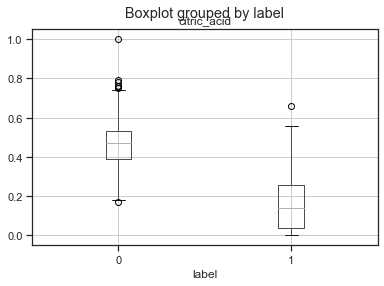

In [86]:
df_k.boxplot(column='citric_acid',by='label')

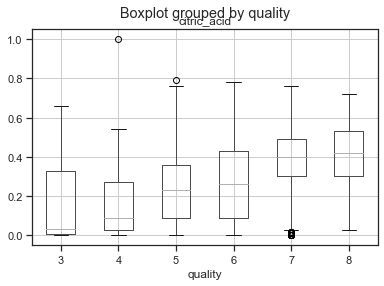

In [87]:
data.boxplot(column='citric_acid',by='quality')


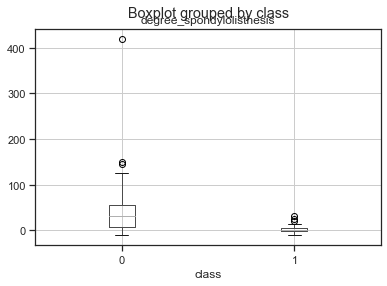

In [76]:
data.boxplot(column='degree_spondylolisthesis',by='class')

We can see our models' differences from the comparision of our algorithms' class counts.



## Build An Classification model :-

## K-Means

In [0]:
df_k.sample(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,label
179,68.721910,49.431864,68.056012,19.290046,125.018517,54.691289,1
101,79.938570,18.774071,63.311835,61.164499,114.787107,38.538741,1
264,54.503685,6.819910,47.000000,47.683775,111.791172,-4.406769,0
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
51,74.433593,41.557331,27.700000,32.876262,107.949304,5.000089,0


### Data Preparation( Splitting the Dependent/Target Variable and the Independent Variables )

In [0]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [0]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=test_size, random_state=seed)

In [0]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train) #fit and transform
x_validate = independent_scalar.transform (x_validate) # only transform

## Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier 
#DecisionTreeClassifier is the corresponding Classifier
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit (x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
predictValues_train = Dtree.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)



predictValues_validate = Dtree.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9953917050691244
Validation Accuracy  ::  0.946236559139785


In [0]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.97      0.89      0.93        38

    accuracy                           0.95        93
   macro avg       0.95      0.94      0.94        93
weighted avg       0.95      0.95      0.95        93



## Random Forest

In [0]:
RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)




Train Accuracy  ::  1.0
Validation Accuracy  ::  0.978494623655914


In [0]:
RFclassifier = RandomForestClassifier(n_estimators = 11, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9953917050691244
Validation Accuracy  ::  0.9354838709677419


In [0]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.97      0.87      0.92        38

    accuracy                           0.94        93
   macro avg       0.94      0.93      0.93        93
weighted avg       0.94      0.94      0.93        93



## KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [0]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [0]:
x_standardize = x.apply(zscore)

In [0]:
#KNN only takes array as input hence it is importanct to convert dataframe to array
x1 = np.array(x_standardize)
y1 = np.array(y)

In [0]:

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x1, y1, test_size=test_size, random_state=seed)

In [0]:
KNN = KNeighborsClassifier(n_neighbors= 8 , weights = 'uniform', metric='euclidean')
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [0]:
predictValues_train = KNN.predict(x_train)
print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)

[1 1 2 1 2 2 1 0 2 0 0 1 0 1 1 0 1 1 0 0 0 2 2 2 2 1 0 0 2 1 0 2 0 1 2 2 0
 1 2 1 0 0 1 0 1 1 1 1 2 0 2 2 0 2 1 0 1 1 2 1 0 2 0 2 0 2 2 2 2 0 0 1 1 0
 2 0 2 0 1 2 0 1 0 1 2 0 2 0 0 0 1 0 2 0 0 0 0 0 2 2 0 1 0 1 0 1 0 2 1 0 1
 2 2 2 0 2 1 0 2 0 2 0 2 2 1 2 0 2 1 0 2 0 1 2 1 1 1 2 0 0 1 1 0 2 2 0 0]
Train Accuracy  ::  0.9727891156462585


In [0]:
predictValues_validate = KNN.predict(x_validate)
print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)
print("Validation Accuracy  :: ",accuracy_validate)

[1 0 1 2 0 2 1 2 2 0 2 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 2 0 1
 2 1 2 0 1 1 0 0 0 2 0 2 2 2 2 0 2 0 1 2 2 0 0 2 2 2]
Validation Accuracy  ::  0.9523809523809523


--------------------

## Agglomerative clustering

In [0]:
df_h.sample(5)

,A,P,C,LK,WK,A_Coef,LKG,label
181,12.46,13.41,0.8706,5.236,3.017,4.9870,5.147,0
99,18.72,16.34,0.8810,6.219,3.684,2.1880,6.097,1
36,16.20,15.27,0.8734,5.826,3.464,2.8230,5.527,2
30,13.16,13.82,0.8662,5.454,2.975,0.8551,5.056,0
130,18.30,15.89,0.9108,5.979,3.755,2.8370,5.962,1


In [0]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [0]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=test_size, random_state=seed)

In [0]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train) #fit and transform
x_validate = independent_scalar.transform (x_validate) # only transform

## Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier 
#DecisionTreeClassifier is the corresponding Classifier
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit (x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
predictValues_train = Dtree.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)



predictValues_validate = Dtree.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9795918367346939
Validation Accuracy  ::  0.9523809523809523


In [0]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.95      0.98        21
           2       1.00      0.90      0.95        20

    accuracy                           0.95        63
   macro avg       0.96      0.95      0.95        63
weighted avg       0.96      0.95      0.95        63



## Random Forest

In [0]:
RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)




Train Accuracy  ::  0.9931972789115646
Validation Accuracy  ::  0.9682539682539683


In [0]:
RFclassifier = RandomForestClassifier(n_estimators = 11, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  1.0
Validation Accuracy  ::  0.9841269841269841


In [0]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.95      0.98        21
           2       0.95      1.00      0.98        20

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



## KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [0]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [0]:
x_standardize = x.apply(zscore)

In [0]:
#KNN only takes array as input hence it is importanct to convert dataframe to array
x1 = np.array(x_standardize)
y1 = np.array(y)

In [0]:

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x1, y1, test_size=test_size, random_state=seed)

In [0]:
KNN = KNeighborsClassifier(n_neighbors= 8 , weights = 'uniform', metric='euclidean')
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [0]:
predictValues_train = KNN.predict(x_train)
print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)

[1 1 2 1 2 2 1 0 2 0 0 1 0 1 1 0 1 1 0 0 0 2 2 2 2 1 0 0 2 1 0 2 0 1 2 2 0
 1 2 1 0 0 1 0 1 1 1 1 2 0 2 2 0 2 1 0 1 1 2 1 0 2 0 2 0 2 2 2 2 0 0 1 1 0
 2 0 2 0 1 2 0 1 0 1 2 0 2 0 0 0 1 0 2 0 0 0 0 0 2 2 0 1 0 1 0 1 0 2 1 0 1
 2 2 2 0 2 1 0 2 0 2 0 2 2 1 2 0 2 1 0 2 0 1 2 1 1 1 2 0 0 1 1 0 2 2 0 0]
Train Accuracy  ::  0.9727891156462585


In [0]:
predictValues_validate = KNN.predict(x_validate)
print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)
print("Validation Accuracy  :: ",accuracy_validate)

[1 0 1 2 0 2 1 2 2 0 2 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 2 0 1
 2 1 2 0 1 1 0 0 0 2 0 2 2 2 2 0 2 0 1 2 2 0 0 2 2 2]
Validation Accuracy  ::  0.9523809523809523


-------------------------